In [13]:
import creds 
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
import numpy as np

In [14]:
p_schema = 'public_nandrianova'

In [15]:
con = f'postgresql://{creds.DB_USER}:{creds.DB_PASS}@{creds.DB_HOST}:{creds.DB_PORT}/{creds.DB_NAME}'
engine = create_engine(con)

(array([18993., 19083., 19174., 19266., 19358., 19448., 19539., 19631.,
        19723.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07'),
  Text(19631.0, 0, '2023-10'),
  Text(19723.0, 0, '2024-01')])

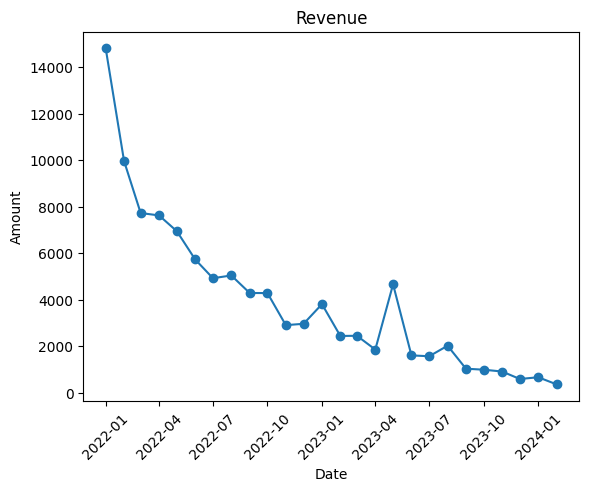

In [16]:
# revenue_report
p_table_name = 'revenue_report'
df = pd.read_sql_table(table_name= p_table_name, schema= p_schema, con= engine)
df = df.sort_values('report_date')


plt.plot(df["report_date"], df["total_amount"], marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Amount")
plt.title("Revenue")

plt.xticks(rotation=45)

(array([18993., 19083., 19174., 19266., 19358., 19448., 19539., 19631.,
        19723.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07'),
  Text(19631.0, 0, '2023-10'),
  Text(19723.0, 0, '2024-01')])

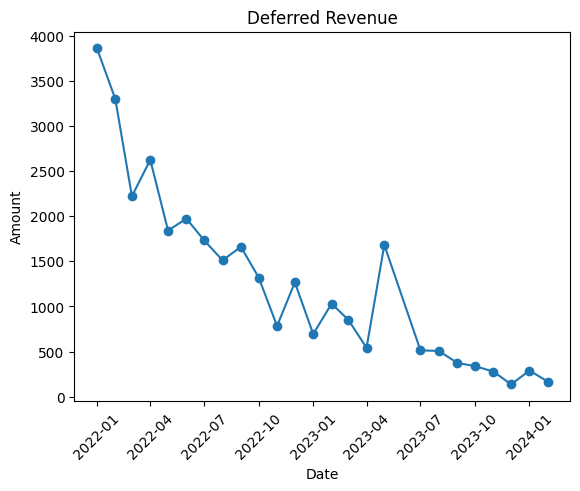

In [17]:
# deferred_revenue_report
p_table_name = 'deferred_revenue_report'
df = pd.read_sql_table(table_name= p_table_name, schema= p_schema, con= engine)
df = df.sort_values('report_date')


plt.plot(df["report_date"], df["total_amount"], marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Amount")
plt.title("Deferred Revenue")

plt.xticks(rotation=45)

([<matplotlib.axis.XTick at 0x14ddca9a0>,
 [Text(18993.0, 0, '2022-01-01'),
  Text(19024.0, 0, '2022-02-01'),
  Text(19174.0, 0, '2022-07-01'),
  Text(19297.0, 0, '2022-11-01')])

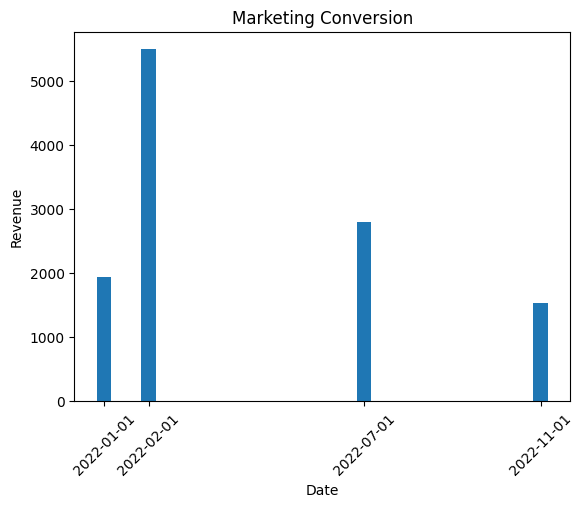

In [20]:
# marketing_conversion_report
p_table_name = 'marketing_conversion_report'
df = pd.read_sql_table(table_name= p_table_name, schema= p_schema, con= engine)
df = df.sort_values('report_date')

# гистограмма для оценки выручки по дням
plt.bar(df["report_date"], df["total_revenue"],  width=10)
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Marketing Conversion")

plt.xticks(rotation=45)
plt.xticks(df["report_date"])



([<matplotlib.patches.Wedge at 0x14dd9e100>,
 [Text(-0.3055927687436849, -1.0566991339504206, 'first_utm_campaign'),
  Text(0.6996079811881183, 0.8488513843175881, 'second_utm_campaign'),
  Text(-0.4931340933442588, 0.9832694269535366, 'third_utm_campaign')],
 [Text(-0.16668696476928266, -0.5763813457911384, '63.3%'),
  Text(0.3816043533753372, 0.46300984599141165, '23.8%'),
  Text(-0.268982232733232, 0.5363287783382926, '13.0%')])

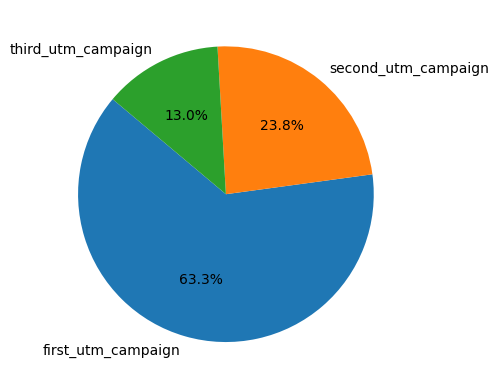

In [19]:
# marketing_conversion_report 2
sql_pie = '''
SELECT campaign_name, SUM(total_revenue) AS total_revenue
FROM postgres.public_nandrianova.marketing_conversion_report
GROUP BY campaign_name
;
'''
df_pie = pd.read_sql(sql_pie, con= engine)
plt.pie(df_pie["total_revenue"], labels=df_pie["campaign_name"], autopct='%1.1f%%', startangle=140)
